In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('fake_job_postings.csv')

In [0]:
# Display basic information about the dataframe
print("Basic information about the dataframe")
display(df.info())

# Display the first few rows of the dataframe
print("First few rows of the dataframe")
display(df.head())

print('Label Counts:')
display(df.fraudulent.value_counts())
fraudelent_ratio = df.fraudulent.value_counts()[1]/ (df.fraudulent.value_counts()[0]+df.fraudulent.value_counts()[1])
print(f"Percentage of fraudulent job postings: {fraudelent_ratio:.2%}")

Basic information about the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry       

job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
1,Marketing Intern,"US, NY, New York",Marketing,null,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR & Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",null,0,1,0,Other,Internship,null,null,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,null,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Paypal, 

Label Counts:


0    17014
1      866
Name: fraudulent, dtype: int64

Percentage of fraudulent job postings: 4.84%


In [0]:
# Select relevant columns for preprocessing
df = df[['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']]

# Replace missing values with empty strings
for c in df.columns:
    df[c].replace(pd.NA, '', inplace=True)
    if pd.api.types.is_string_dtype(df[c]): 
        df[c] = df[c].str.lower()

# Add word count features to specific columns
count_cols = ['company_profile', 'description', 'requirements', 'benefits']
for c in count_cols:
    df[c + '_word_count'] = df[c].str.split().str.len()

df['total_word_count'] = df.apply(lambda row: sum(row[c].split().__len__() for c in df.columns if isinstance(row[c], str)), axis=1)

# Concatenate all text columns into a single column for embedding creation
cols = ['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
df['all_text'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df = df[['all_text', 'company_profile_word_count', 'description_word_count', 'requirements_word_count', 'benefits_word_count', 'total_word_count', 'fraudulent']]
processed_kaggle_dataset = df
processed_kaggle_dataset.to_csv('processed_fake_job_postings.csv', index=False)

Plot a histogram for total_word_count column (which includes 'company_profile', 'description', 'requirements', 'benefits')

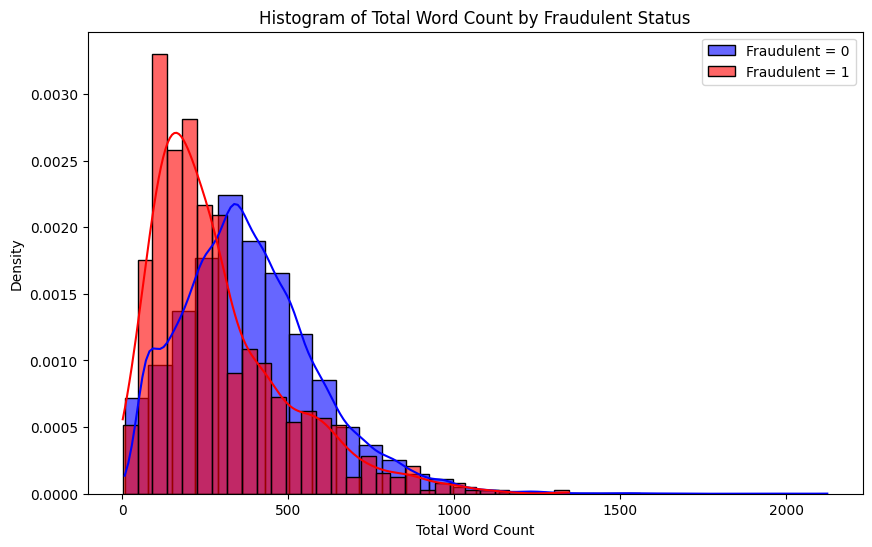

In [0]:
# Filter data for fraudulent = 0 and fraudulent = 1
df_fraud_0 = df[df["fraudulent"] == 0]
df_fraud_1 = df[df["fraudulent"] == 1]

# Plot histogram for total_word_count column
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity

# Plot fraudulent = 0
sns.histplot(
    df_fraud_0["total_word_count"],
    bins=30,
    color="blue",
    label="Fraudulent = 0",
    kde=True,
    stat="density",
    alpha=0.6,
)

# Plot fraudulent = 1
sns.histplot(
    df_fraud_1["total_word_count"],
    bins=30,
    color="red",
    label="Fraudulent = 1",
    kde=True,
    stat="density",
    alpha=0.6,
)

# Add title and labels
plt.title("Histogram of Total Word Count by Fraudulent Status")
plt.xlabel("Total Word Count")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()


Fraudulent postings tend to have lower word counts!